# Plots

In [2]:
import numpy as np
import pandas as pd 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import torch

### Training

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


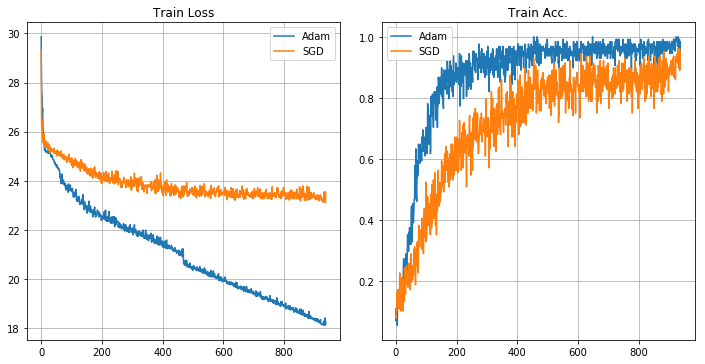

In [4]:
adam = 'checkpoint/checkpoint_MNIST/trainlogLeNet5_optadam_lr0.001_bs128.txt'
sgd = 'checkpoint/checkpoint_MNIST/trainlogLeNet5_optsgd_lr0.01_bs128.txt'
#hwa = 'checkpoint/checkpoint_MNIST/trainlogLeNet5_opthwa_lr0.01_bs128.txt'

runadam = pd.read_table(adam, index_col = 0, sep = '\t')
runsgd = pd.read_table(sgd, index_col = 0, sep = '\t')

xaxis = range(len(runadam['Train Loss']))
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runadam['Train Loss'], label='Adam')
plt.plot(xaxis, runsgd['Train Loss'], label='SGD')
plt.title('Train Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runadam['Train Acc.'], label='Adam')
plt.plot(xaxis, runsgd['Train Acc.'], label='SGD')
plt.title('Train Acc.')
plt.grid(True)
plt.legend()

### Testing

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


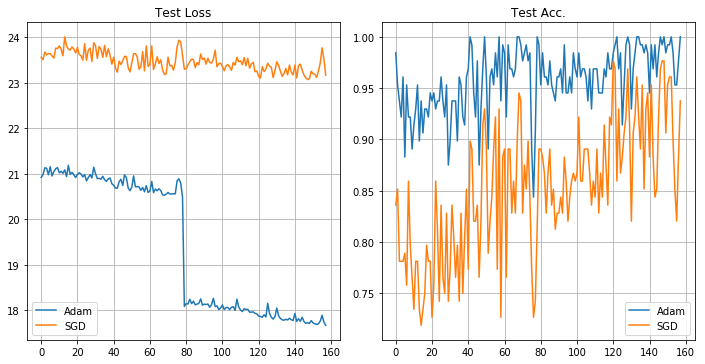

In [6]:
adam = 'checkpoint/checkpoint_MNIST/testlogLeNet5_optadam_lr0.001_bs128.txt'
sgd = 'checkpoint/checkpoint_MNIST/testlogLeNet5_optsgd_lr0.01_bs128.txt'

runadam = pd.read_table(adam, index_col = 0, sep = '\t')
runsgd = pd.read_table(sgd, index_col = 0, sep = '\t')

xaxis = range(len(runadam['Test Loss']))
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runadam['Test Loss'], label='Adam')
plt.plot(xaxis, runsgd['Test Loss'], label='SGD')
plt.title('Test Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runadam['Test Acc.'], label='Adam')
plt.plot(xaxis, runsgd['Test Acc.'], label='SGD')
plt.title('Test Acc.')
plt.grid(True)
plt.legend()

In [56]:
with open ('params/trained_weights', 'rb') as fp:
    trained_weights = torch.load(fp)
with open ('params/init_weights', 'rb') as fp:
    init_weights = torch.load(fp)
init_weights = init_weights.detach().numpy()

In [40]:
weights = list(map(list, zip(*trained_weights)))

In [57]:
scalarindex = 2 #between 0 and 9 (since fc1 output)
weights = []
for element in trained_weights:
        weights.append(element[scalarindex])
weights = list(map(list, zip(*weights)))

# Plot distance for N neurons (not averaged)

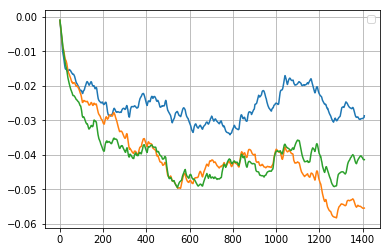

In [58]:
dim = 3 #scalar weight index
for dim in range(200,203):
    distanceweights = [x - init_weights[scalarindex][dim] for x in weights[dim]] 
    xaxis = range(1,len(distanceweights)+1)
    plt.plot(xaxis, distanceweights)
    plt.grid(True)
    plt.legend()

# Plot average distance for N neurons

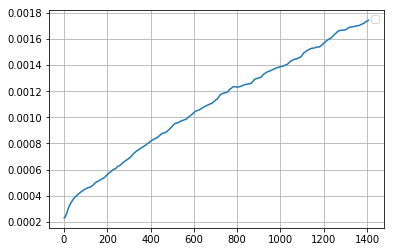

In [65]:
def mean(a):
    return sum(a) / len(a)

scalarindex = 9
distanceweights=[]
N_neurons = 2000
for dim in range(N_neurons):
    distanceweights.append([(x - init_weights[scalarindex][dim])**2 for x in weights[dim]] )
distanceweights = map(mean, zip(*distanceweights))
xaxis = range(1,len(distanceweights)+1)
plt.plot(xaxis, distanceweights)
plt.grid(True)
plt.legend()